##### Author: Davoud Masoumi dmasoumi@ucmerced.edu 
Version 2, Updated on November 2022

In [1]:
import gizmo_analysis as gizmo
import utilities as ut
import numpy as np

In [2]:
## NOTE: Inputs can be either position or velocity in the "Translated Box Coordinate Frame"
## If inputs are positions in the "Translated Box Coordinate Frame", outputs will be positions in the "Loebman Lab Coordinate Frame"
## If inputs are velocities in the "Translated Box Coordinate Frame", outputs will be velocities in the "Loebman Lab Coordinate Frame"

def ll_coordinate_transformation(rotation_matrix, x_translated_box_coordinate, y_translated_box_coordinate, z_translated_box_coordinate):
    
    # identifying the elements of the True Rotation Matrix
    rot_mat11 = rotation_matrix[0][0][0]
    rot_mat12 = rotation_matrix[0][0][1]
    rot_mat13 = rotation_matrix[0][0][2]
    
    rot_mat21 = rotation_matrix[0][1][0]
    rot_mat22 = rotation_matrix[0][1][1]
    rot_mat23 = rotation_matrix[0][1][2]
    
    rot_mat31 = rotation_matrix[0][2][0]
    rot_mat32 = rotation_matrix[0][2][1]
    rot_mat33 = rotation_matrix[0][2][2]
    
    ''' 
        Finding the three "True Rotation Angles": rot_angle_0, rot_angle_1 and rot_angle_2
        
        Note that there are eight possible sets of rotation angles.

        We use the following approach to know which set of rotation angles is the "True Rotation Angles" set.
        For each of the eight possible sets of rotation angles, 
        we compute the rotation matrix (let's call it the Recovered Rotation Matrix), 
        and we check which of these "Recovered Rotation Matrices" matches the "True Rotation Matrix."
        
    '''
    
    rot_angle_0 = [] 
    rot_angle_1 = []
    rot_angle_2 = []

    for k in range (2):
        for j in range (2):
            for i in range (2):
                recovered_rotation_angles = [0, 0, 0]
                recovered_rotation_angles[0] =  np.arctan(-rot_mat32/rot_mat33) + (i*np.pi)
                recovered_rotation_angles[1] =  np.arctan(rot_mat31/(np.sqrt(1- (rot_mat31**2)))) + (j*np.pi)
                recovered_rotation_angles[2] =  np.arctan(-rot_mat21/rot_mat11) + (k*np.pi)

                recovered_rot_mat11 = np.cos(recovered_rotation_angles[1]) * np.cos(recovered_rotation_angles[2])
                recovered_rot_mat12 = np.cos(recovered_rotation_angles[0]) * np.sin(recovered_rotation_angles[2]) + np.sin(recovered_rotation_angles[0]) * np.sin(recovered_rotation_angles[1]) * np.cos(recovered_rotation_angles[2])
                recovered_rot_mat13 = np.sin(recovered_rotation_angles[0]) * np.sin(recovered_rotation_angles[2]) - np.cos(recovered_rotation_angles[0]) * np.sin(recovered_rotation_angles[1]) * np.cos(recovered_rotation_angles[2])
                recovered_rot_mat21 = -np.cos(recovered_rotation_angles[1]) * np.sin(recovered_rotation_angles[2])
                recovered_rot_mat22 = np.cos(recovered_rotation_angles[0]) * np.cos(recovered_rotation_angles[2]) - np.sin(recovered_rotation_angles[0]) * np.sin(recovered_rotation_angles[1]) * np.sin(recovered_rotation_angles[2])
                recovered_rot_mat23 = np.sin(recovered_rotation_angles[0]) * np.cos(recovered_rotation_angles[2]) + np.cos(recovered_rotation_angles[0]) * np.sin(recovered_rotation_angles[1]) * np.sin(recovered_rotation_angles[2])
                recovered_rot_mat31 = np.sin(recovered_rotation_angles[1])
                recovered_rot_mat32 = -np.sin(recovered_rotation_angles[0]) * np.cos(recovered_rotation_angles[1])
                recovered_rot_mat33 = np.cos(recovered_rotation_angles[0]) * np.cos(recovered_rotation_angles[1])

                if ((np.round(recovered_rot_mat11.astype('float64'), 3) == np.round(rot_mat11.astype('float64'), 3)) & 
                    (np.round(recovered_rot_mat12.astype('float64'), 3) == np.round(rot_mat12.astype('float64'), 3)) & 
                    (np.round(recovered_rot_mat13.astype('float64'), 3) == np.round(rot_mat13.astype('float64'), 3)) &
                    (np.round(recovered_rot_mat21.astype('float64'), 3) == np.round(rot_mat21.astype('float64'), 3)) &
                    (np.round(recovered_rot_mat22.astype('float64'), 3) == np.round(rot_mat22.astype('float64'), 3)) &
                    (np.round(recovered_rot_mat23.astype('float64'), 3) == np.round(rot_mat23.astype('float64'), 3)) &
                    (np.round(recovered_rot_mat31.astype('float64'), 3) == np.round(rot_mat31.astype('float64'), 3)) &
                    (np.round(recovered_rot_mat32.astype('float64'), 3) == np.round(rot_mat32.astype('float64'), 3)) &
                    (np.round(recovered_rot_mat33.astype('float64'), 3) == np.round(rot_mat33.astype('float64'), 3))):

                    rot_angle_0.append(recovered_rotation_angles[0])
                    rot_angle_1.append(recovered_rotation_angles[1])
                    rot_angle_2.append(recovered_rotation_angles[2])

                    break
                    del(recovered_rotation_angles)
                    
    ''' 
        Constructing the "Loebman Lab Transformation Matrix": ll_tans_matij   
    '''
    
    ll_trans_mat11 = np.cos(rot_angle_1)
    ll_trans_mat12 = np.sin(rot_angle_0) * np.sin(rot_angle_1)
    ll_trans_mat13 = - np.cos(rot_angle_0) * np.sin(rot_angle_1)
    ll_trans_mat21 = np.zeros(1)
    ll_trans_mat22 = np.cos(rot_angle_0)
    ll_trans_mat23 = np.sin(rot_angle_0) 
    ll_trans_mat31 = np.sin(rot_angle_1)
    ll_trans_mat32 = -np.sin(rot_angle_0) * np.cos(rot_angle_1)
    ll_trans_mat33 = np.cos(rot_angle_0) * np.cos(rot_angle_1)
    
    '''
        Finding coordinate of particles in the "Loebman Lab Coordinate System": x_ll, y_ll and z_ll
    '''
    
    x_ll = (ll_trans_mat11*x_translated_box_coordinate) + (ll_trans_mat12*y_translated_box_coordinate) + (ll_trans_mat13*z_translated_box_coordinate)
    y_ll = (ll_trans_mat21*x_translated_box_coordinate) + (ll_trans_mat22*y_translated_box_coordinate) + (ll_trans_mat23*z_translated_box_coordinate)
    z_ll = (ll_trans_mat31*x_translated_box_coordinate) + (ll_trans_mat32*y_translated_box_coordinate) + (ll_trans_mat33*z_translated_box_coordinate)
    
    position_ll = np.asarray((x_ll, y_ll, z_ll)).T
    
    return position_ll

#### We show how one can compute the change in position and velocity of star particles.

#### In this Jupyter notebook, we consider the star particle with the following IDs:
#####   selected_star_id:  32171833
#####   selected_star_idchild:  0
#####   selected_star_idgeneration:  0

In [3]:
selected_star_id =  32171833
selected_star_idchild =  0
selected_star_idgeneration =  0

### Step 1: 
#### (I) Identifying the star with three given IDs in two different snapshots 696 and 695
#### (II) Reading the position and velocity of the star with respect to the "Box Coordinate Frame"
#### (II) Computing the position and velocity of the star with respect to the "Loebman Lab Coordinate Frame" 

### 1-1) snapshot 696

In [3]:
simname = 'm12f_res7100_mhdcv'
simdir = '/scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12f_r7100/mhdcv/1Myr/'
snapnumber = 597


#simname = 'm12i_res7100'                                                         
#simdir = '/scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12i_r7100/mhdcv/1Myr/fire2/'    # on stampede2
#simdir = '/share/wetzellab/m12i/m12i_r7100_mhdcv/1Myr/fire2'                               # on pleoton
#snapnumber=696
part_696 = gizmo.io.Read.read_snapshots(['all'], 'snapshot_index', snapnumber, simulation_directory=simdir, assign_hosts_rotation=True)


# in utilities.simulation.Snapshot():
* reading:  scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12f_r7100/mhdcv/1Myr/snapshot_times.txt

  using snapshot index = 597, redshift = 0.007


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12f_r7100/mhdcv/1Myr/output/snapshot_597.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 81363848 particles
    dark2     (id = 2): 7086235 particles
    gas       (id = 0): 64166200 particles
    star      (id = 4): 17784971 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['dark', 'dark2', 'gas', 'star']
  gas properties: ['density', 'electron.fraction', 'hydrogen.neutral.fraction', 'id', 'id.child', 'id.generation', 'magnetic.field', 'mass', 'massfraction', 'position', 'sfr', 'size', 'temperature', 'velocity']

* reading particles from:
    scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12f_r7100/mhdcv/1Myr/output/snapsho

In [4]:
''' read the position of ALL stars in the "TRANSLATED BOX COORDINATE FRAME" '''

x_696 = part_696['star'].prop('host.distance')[:,0]
y_696 = part_696['star'].prop('host.distance')[:,1]
z_696 = part_696['star'].prop('host.distance')[:,2]

vx_696 = part_696['star'].prop('host.velocity')[:,0]
vy_696 = part_696['star'].prop('host.velocity')[:,1]
vz_696 = part_696['star'].prop('host.velocity')[:,2]

star_id_696 = part_696['star']['id']
star_idchild_696 = part_696['star']['id.child']
star_idgeneration_696 = part_696['star']['id.generation']

In [ ]:
''' read the "True Rotation Matrix": i.e., the Rotation Matrix of the snapshot which is loaded '''

# we use "rm" to represent the "True Rotation Matrix" in our code
rm_696 = part_696.host['rotation'] 

In [7]:
''' we wnat to select and track ONLY ONE stars with the given 
    id = 32171833 , 
    idchild = 0, and 
    idgeneration = 0 '''

mask_696 = np.where((star_id_696 == 32171833) & (star_idchild_696 == 0) & (star_idgeneration_696 == 0))

''' identifying the position and velocity of the selected star at snapshot 696 '''

# x, y, z: position of the selected star with respect to the "TRANSLATED BOX COORDINATE FRAME"
# vx, vy, vz: velocity of the selected star with respect to the center of the host galaxy in the "TRANSLATED BOX COORDINATE FRAME"

x_selected_696 = x_696[mask_696[0][0]]
y_selected_696 = y_696[mask_696[0][0]]
z_selected_696 = z_696[mask_696[0][0]]

vx_selected_696 = vx_696[mask_696[0][0]]
vy_selected_696 = vy_696[mask_696[0][0]]
vz_selected_696 = vz_696[mask_696[0][0]]

''' 
   converting the position and velocity of the selected star at snapshot 696 
   from the "TRANSLATED BOX COORDINATE FRAME" 
   to the "Loebman Lab COORDINATE FRAME"
'''

## For the exmple provided in this jupyter notebook

## Inputs: 
# rotation_matrix ---------------------> rm_696
# x_translated_box_coordinate  --------> x_selected_696
# y_translated_box_coordinate  --------> y_selected_696
# z_translated_box_coordinate  --------> z_selected_696

x_selected_696_ll = ll_coordinate_transformation(rm_696, x_selected_696, y_selected_696, z_selected_696)[:,0]
y_selected_696_ll = ll_coordinate_transformation(rm_696, x_selected_696, y_selected_696, z_selected_696)[:,1]
z_selected_696_ll = ll_coordinate_transformation(rm_696, x_selected_696, y_selected_696, z_selected_696)[:,2]


## Inputs: 
# rotation_matrix ---------------------> rm_696
# x_translated_box_coordinate  --------> vx_selected_696
# y_translated_box_coordinate  --------> vy_selected_696
# z_translated_box_coordinate  --------> vz_selected_696

vx_selected_696_ll = ll_coordinate_transformation(rm_696, vx_selected_696, vy_selected_696, vz_selected_696)[:,0]
vy_selected_696_ll = ll_coordinate_transformation(rm_696, vx_selected_696, vy_selected_696, vz_selected_696)[:,1]
vz_selected_696_ll = ll_coordinate_transformation(rm_696, vx_selected_696, vy_selected_696, vz_selected_696)[:,2]

In [11]:
print(x_selected_696_ll)
print(x_selected_696)



[-1.05280185]
-0.8052467137061134


In [8]:
del(part_696, x_696, y_696, z_696, 
    vx_696, vy_696, vz_696, 
    star_id_696, star_idchild_696, star_idgeneration_696)

### 1-2) Snapshot 695

In [9]:
simname = 'm12i_res7100'                                                         
simdir = '/scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12i_r7100/mhdcv/1Myr/fire2/'    # on stampede2
#simdir = '/share/wetzellab/m12i/m12i_r7100_mhdcv/1Myr/fire2'                               # on pleoton

part_695 = gizmo.io.Read.read_snapshots(['all'], 'snapshot_index', 695, simulation_directory=simdir, assign_hosts_rotation=True)


# in utilities.simulation.Snapshot():
* reading:  scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12i_r7100/mhdcv/1Myr/fire2/snapshot_times.txt

  using snapshot index = 695, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12i_r7100/mhdcv/1Myr/fire2/output/snapdir_695/snapshot_695.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 70514272 particles
    dark2     (id = 2): 5513331 particles
    gas       (id = 0): 55618422 particles
    star      (id = 4): 15374989 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['dark', 'dark2', 'gas', 'star']
  gas properties: ['acceleration', 'density', 'electron.fraction', 'hydrogen.neutral.fraction', 'id', 'id.child', 'id.generation', 'magnetic.field', 'mass', 'massfraction', 'photon.energy', 'position', 'potential', 'sfr', 'size', 'temperature', 'velocity']

* reading particles from:
    snapshot_69

In [10]:
''' read the position of ALL stars in the "TRANSLATED BOX COORDINATE FRAME" '''

x_695 = part_695['star'].prop('host.distance')[:,0]
y_695 = part_695['star'].prop('host.distance')[:,1]
z_695 = part_695['star'].prop('host.distance')[:,2]

vx_695 = part_695['star'].prop('host.velocity')[:,0]
vy_695 = part_695['star'].prop('host.velocity')[:,1]
vz_695 = part_695['star'].prop('host.velocity')[:,2]

star_id_695 = part_695['star']['id']
star_idchild_695 = part_695['star']['id.child']
star_idgeneration_695 = part_695['star']['id.generation']

In [11]:
''' read the "True Rotation Matrix": i.e., the Rotation Matrix of the snapshot which is loaded '''

# we use "rm" to represent the "True Rotation Matrix" in our code
rm_695 = part_695.host['rotation'] 

In [12]:
''' we wnat to identify the same star in snapshot 695;
    we use the given IDs for this aim
    id = 32171833 , 
    idchild = 0, and 
    idgeneration = 0 '''

mask_695 = np.where((star_id_695 == 32171833) & (star_idchild_695 == 0) & (star_idgeneration_695 == 0))

''' identifying the position and velocity of the selected star at snapshot 695 '''

# x, y, z: position of the selected star with respect to the "TRANSLATED BOX COORDINATE FRAME"
# vx, vy, vz: velocity of the selected star with respect to the center of the host galaxy in the "TRANSLATED BOX COORDINATE FRAME"

x_selected_695 = x_695[mask_695[0][0]]
y_selected_695 = y_695[mask_695[0][0]]
z_selected_695 = z_695[mask_695[0][0]]

vx_selected_695 = vx_695[mask_695[0][0]]
vy_selected_695 = vy_695[mask_695[0][0]]
vz_selected_695 = vz_695[mask_695[0][0]]

''' 
   converting the position and velocity of the selected star at snapshot 695 
   from the "TRANSLATED BOX COORDINATE FRAME" 
   to the "Loebman Lab COORDINATE FRAME"
'''

## For the exmple provided in this jupyter notebook

## Inputs: 
# rotation_matrix ---------------------> rm_695
# x_translated_box_coordinate  --------> x_selected_695
# y_translated_box_coordinate  --------> y_selected_695
# z_translated_box_coordinate  --------> z_selected_695

x_selected_695_ll = ll_coordinate_transformation(rm_695, x_selected_695, y_selected_695, z_selected_695)[:,0]
y_selected_695_ll = ll_coordinate_transformation(rm_695, x_selected_695, y_selected_695, z_selected_695)[:,1]
z_selected_695_ll = ll_coordinate_transformation(rm_695, x_selected_695, y_selected_695, z_selected_695)[:,2]


## Inputs: 
# rotation_matrix ---------------------> rm_695
# x_translated_box_coordinate  --------> vx_selected_695
# y_translated_box_coordinate  --------> vy_selected_695
# z_translated_box_coordinate  --------> vz_selected_695

vx_selected_695_ll = ll_coordinate_transformation(rm_695, vx_selected_695, vy_selected_695, vz_selected_695)[:,0]
vy_selected_695_ll = ll_coordinate_transformation(rm_695, vx_selected_695, vy_selected_695, vz_selected_695)[:,1]
vz_selected_695_ll = ll_coordinate_transformation(rm_695, vx_selected_695, vy_selected_695, vz_selected_695)[:,2]

In [13]:
del(part_695, x_695, y_695, z_695, 
    vx_695, vy_695, vz_695, 
    star_id_695, star_idchild_695, star_idgeneration_695)

### Step 2: Computing Change in Position and Velocity

In [14]:
'In the Translated Box Coordinate Frame:'

Δx = x_selected_696 - x_selected_695
Δy = y_selected_696 - y_selected_695
Δz = z_selected_696 - z_selected_695
change_in_position = np.sqrt(Δx**2 + Δy**2 + Δz**2)

Δvx = vx_selected_696 - vx_selected_695
Δvy = vy_selected_696 - vy_selected_695
Δvz = vz_selected_696 - vz_selected_695
change_in_velocity = np.sqrt(Δvx**2 + Δvy**2 + Δvz**2)

'In the Loebman Lab Coordinate Frame:'

Δx_ll = x_selected_696_ll - x_selected_695_ll
Δy_ll = y_selected_696_ll - y_selected_695_ll
Δz_ll = z_selected_696_ll - z_selected_695_ll
change_in_position_ll = np.sqrt(Δx_ll**2 + Δy_ll**2 + Δz_ll**2)

Δvx_ll = vx_selected_696_ll - vx_selected_695_ll
Δvy_ll = vy_selected_696_ll - vy_selected_695_ll
Δvz_ll = vz_selected_696_ll - vz_selected_695_ll
change_in_velocity_ll = np.sqrt(Δvx_ll**2 + Δvy_ll**2 + Δvz_ll**2)

### Step 3: Comparison and Visualization

In [15]:
print('In the Translated Box Coordinate Frame:')
print('Δx = ', Δx, 'kpc')
print('Δy = ', Δy, 'kpc')
print('Δz = ', Δz, 'kpc')
print('change in position = ', change_in_position, 'kpc')

print( )

print('In the Loebman Lab Coordinate Frame:')
print('Δx_{Loebman Lab} = ', Δx_ll, 'kpc')
print('Δy_{Loebman Lab} = ', Δy_ll, 'kpc')
print('Δz_{Loebman Lab} = ', Δz_ll, 'kpc')
print('change in position_{Loebman Lab} = ', change_in_position_ll, 'kpc')

print( )
print('##########################################')
print('##########################################')
print( )

print('In the Translated Box Coordinate Frame:')
print('Δvx = ', Δvx, 'km/s')
print('Δvy = ', Δvy, 'km/s')
print('Δvz = ', Δvz, 'km/s')
print('change in velocity = ', change_in_velocity, 'km/s')

print( )

print('In the Loebman Lab Coordinate Frame:')
print('Δvx_{Loebman Lab} = ', Δvx_ll, 'km/s')
print('Δvy_{Loebman Lab} = ', Δvy_ll, 'km/s')
print('Δvz_{Loebman Lab} = ', Δvz_ll, 'km/s')
print('change in velocity_{Loebman Lab} = ', change_in_velocity_ll, 'km/s')

In the Translated Box Coordinate Frame:
Δx =  0.16223884419413076 kpc
Δy =  0.02964239132057056 kpc
Δz =  -0.08939696958879129 kpc
change in position =  0.18759512813585685 kpc

In the Loebman Lab Coordinate Frame:
Δx_{Loebman Lab} =  [0.16972408] kpc
Δy_{Loebman Lab} =  [-0.05852377] kpc
Δz_{Loebman Lab} =  [0.05180407] kpc
change in position_{Loebman Lab} =  [0.18685544] kpc

##########################################
##########################################

In the Translated Box Coordinate Frame:
Δvx =  0.38893127 km/s
Δvy =  -6.647808 km/s
Δvz =  3.7898102 km/s
change in velocity =  7.662067667612204 km/s

In the Loebman Lab Coordinate Frame:
Δvx_{Loebman Lab} =  [0.21434083] km/s
Δvy_{Loebman Lab} =  [7.53000908] km/s
Δvz_{Loebman Lab} =  [-1.28085066] km/s
change in velocity_{Loebman Lab} =  [7.64117511] km/s


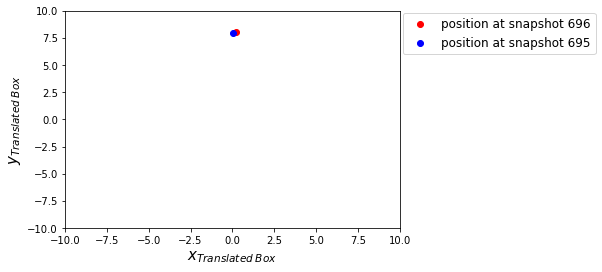

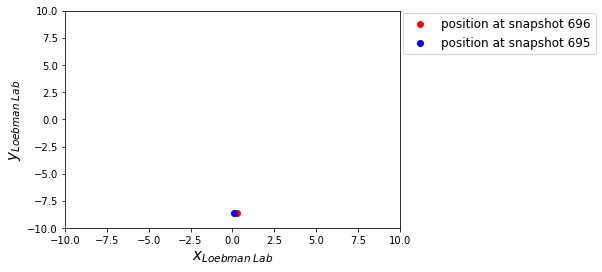

In [16]:
import matplotlib.pyplot as plt

plt.scatter(x_selected_696, y_selected_696, color='red', label='position at snapshot 696')
plt.scatter(x_selected_695, y_selected_695, color='blue', label='position at snapshot 695')
plt.xlabel('$x_{Translated\; Box}$', fontsize=15)
plt.ylabel('$y_{Translated\; Box}$', fontsize=15)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.legend(loc=(1.01, 0.8), fontsize=12)
plt.show()

plt.scatter(x_selected_696_ll, y_selected_696_ll, color='red', label='position at snapshot 696')
plt.scatter(x_selected_695_ll, y_selected_695_ll, color='blue', label='position at snapshot 695')
plt.xlabel('$x_{Loebman\; Lab}$', fontsize=15)
plt.ylabel('$y_{Loebman\; Lab}$', fontsize=15)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.legend(loc=(1.01, 0.8), fontsize=12)
plt.show()